# Internet Access in Indonesian Schools: Impact on Educational Equity

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("IndonesianSchool_InternetAccess_Data.csv", encoding="latin1", sep=";")  # Ensure correct encoding

# Preview
print(df.head())
print(df.info())

     Education Level        Province   Island  \
0  Elementary School            Aceh  Sumatra   
1  Elementary School  Sumatera Utara  Sumatra   
2  Elementary School  Sumatera Barat  Sumatra   
3  Elementary School            Riau  Sumatra   
4  Elementary School           Jambi  Sumatra   

   State-owned School with Internet  Private-owned School with Internet  \
0                              2188                                 156   
1                              5257                                1321   
2                              2599                                 272   
3                              2426                                 498   
4                              1742                                 136   

   Total Schools with Internet  Total State-owned Schools  \
0                         2344                       3335   
1                         6578                       8167   
2                         2871                       3892   
3         

## Total schools with vs. without internet

Average schools without internet: 19.92087292697908 %

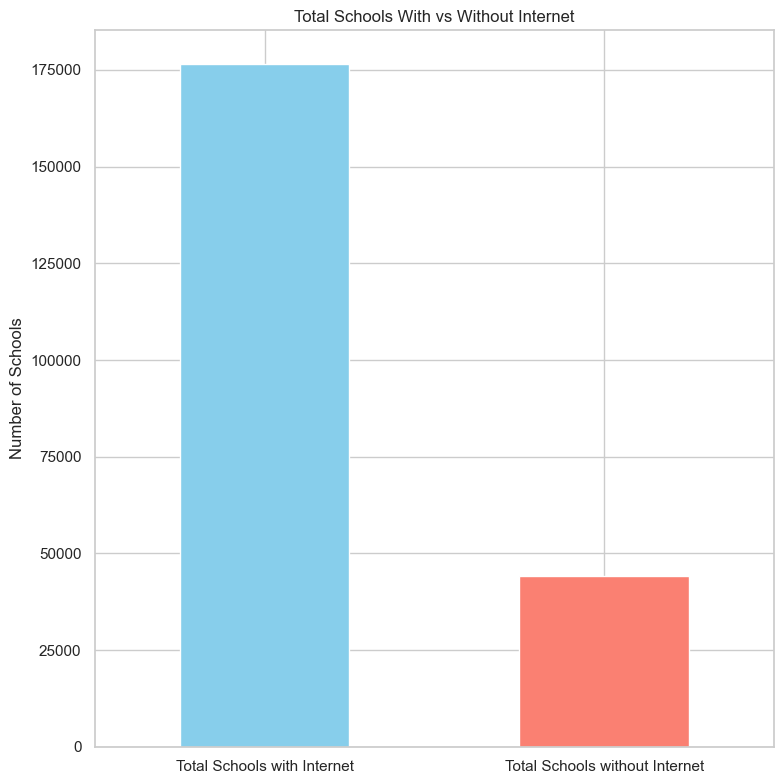

Average schools without internet (%): 19.92087292697908


In [ ]:
# Plot 1: Total schools with vs. without internet

plt.figure(figsize=(8, 8))
df[['Total Schools with Internet', 'Total Schools without Internet']].sum().plot(
    kind='bar', color=['skyblue', 'salmon'])
plt.title("Total Schools With vs Without Internet")
plt.ylabel("Number of Schools")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

avg_without_internet = (
    df['Total Schools without Internet'].sum() / df['Total Schools'].sum()
    ) * 100

print("Average schools without internet (%):", avg_without_internet);

## Internet access by school ownership type

<Figure size 800x600 with 0 Axes>

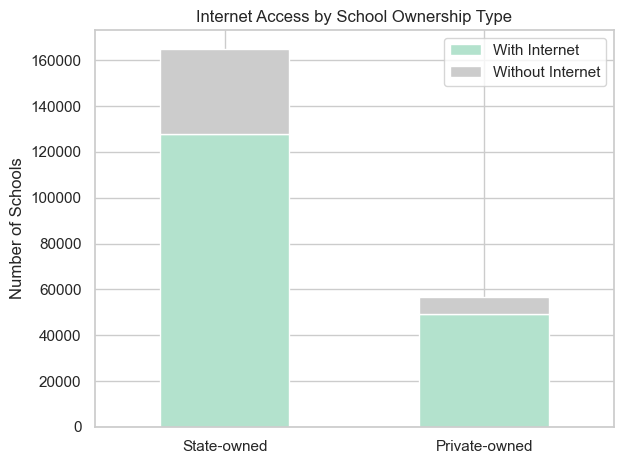

In [53]:
# Plot 2: Internet access by school ownership type
ownership_data = {
    'With Internet': [
        df['State-owned School with Internet'].sum(),
        df['Private-owned School with Internet'].sum()
    ],
    'Without Internet': [
        df['State-owned School without Internet'].sum(),
        df['Private-owned School without Internet'].sum()
    ]
}
ownership_df = pd.DataFrame(ownership_data, index=['State-owned', 'Private-owned'])

plt.figure(figsize=(8, 6))
ownership_df.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.title("Internet Access by School Ownership Type")
plt.ylabel("Number of Schools")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Internet access by education levels

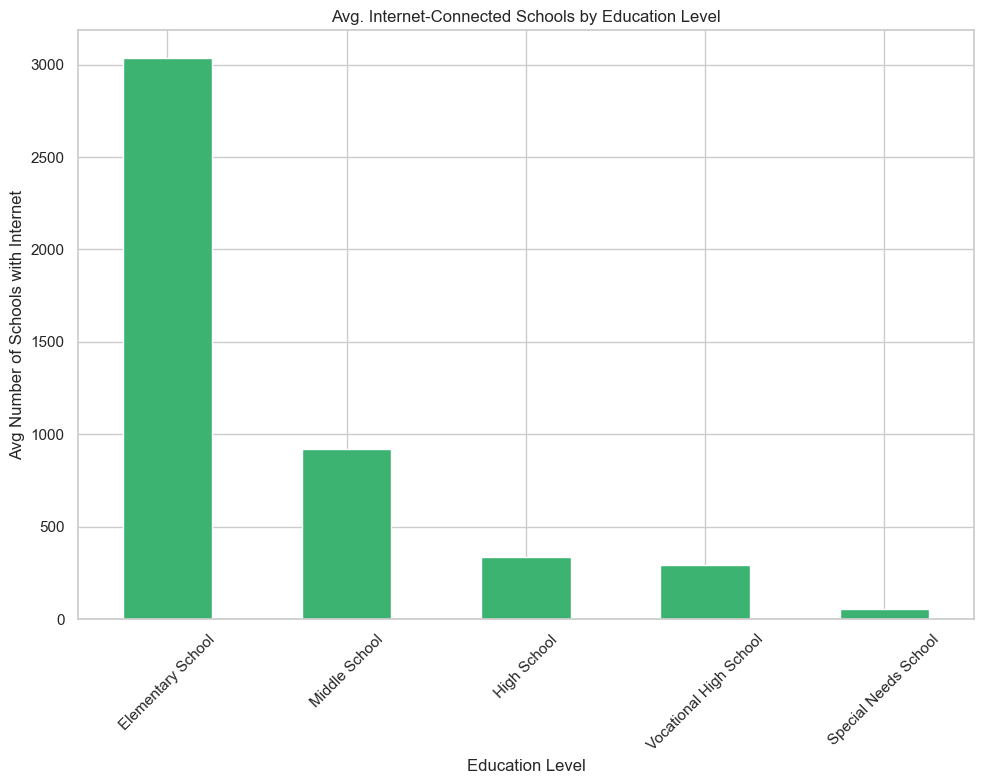

In [72]:
# Plot 1: Internet access by education levels

plt.figure(figsize=(10, 8))
education_level_avg = df.groupby('Education Level')['Total Schools with Internet'].mean().sort_values(ascending=False)
education_level_avg.head(5).plot(kind='bar', color='mediumseagreen')
plt.title("Avg. Internet-Connected Schools by Education Level")
plt.ylabel("Avg Number of Schools with Internet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Distribution of schools with internet by island

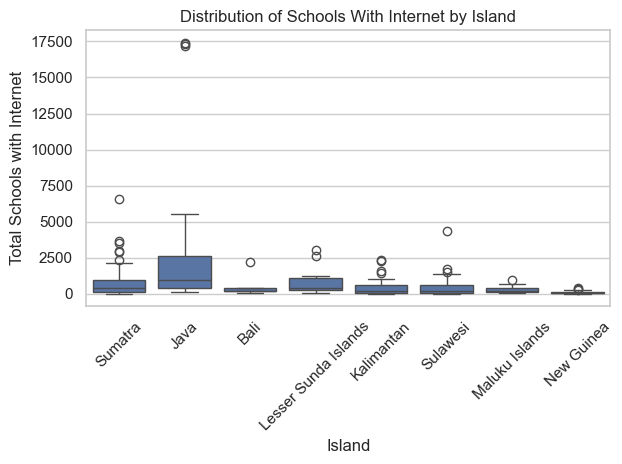

In [64]:
# Plot 3: Boxplot - distribution of schools with internet by island

sns.boxplot(data=df, x='Island', y='Total Schools with Internet')
plt.title("Distribution of Schools With Internet by Island")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 5 provinces by average internet-connected schools

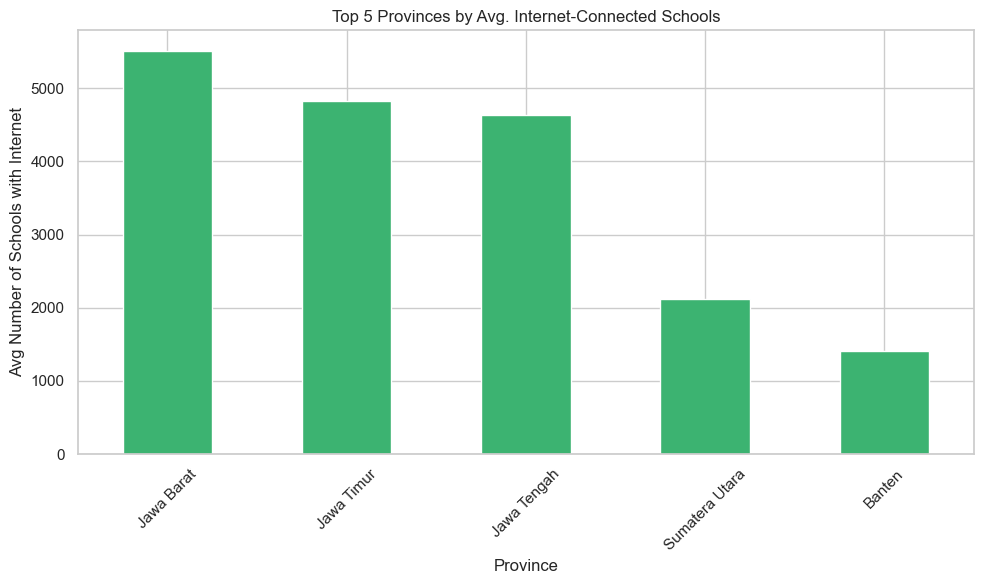

In [60]:
# Plot 4: Top 5 provinces by average internet-connected schools

province_avg = df.groupby('Province')['Total Schools with Internet'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
province_avg.head(5).plot(kind='bar', color='mediumseagreen')
plt.title("Top 5 Provinces by Avg. Internet-Connected Schools")
plt.ylabel("Avg Number of Schools with Internet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 5 Provinces by average schools without internet

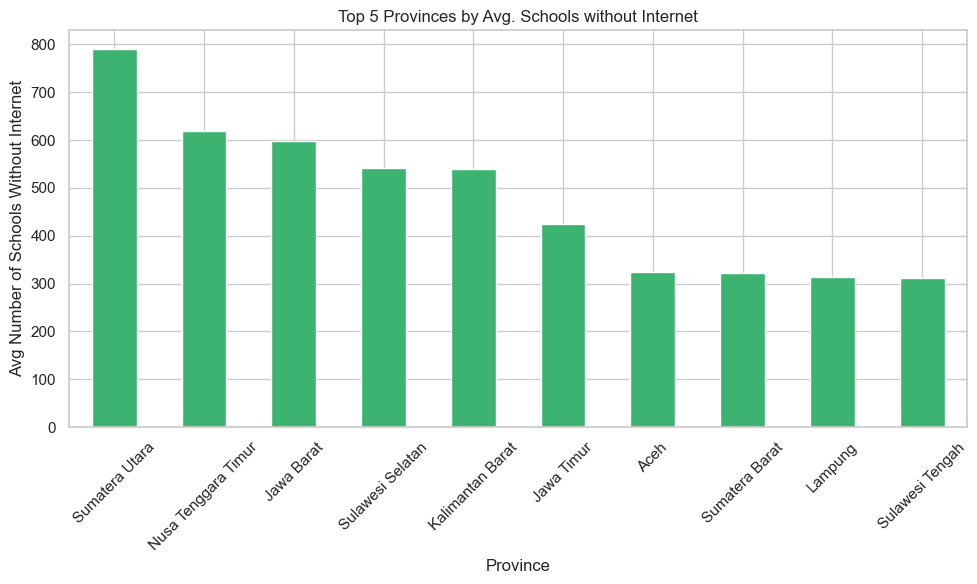

In [ ]:
# Plot 5: Top 5 provinces by average schools without internet

province_avg = df.groupby('Province')['Total Schools without Internet'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
province_avg.head(10).plot(kind='bar', color='mediumseagreen')
plt.title("Top 5 Provinces by Avg. Schools without Internet")
plt.ylabel("Avg Number of Schools Without Internet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Percentage of schools with internet access (relative to total schools per province)

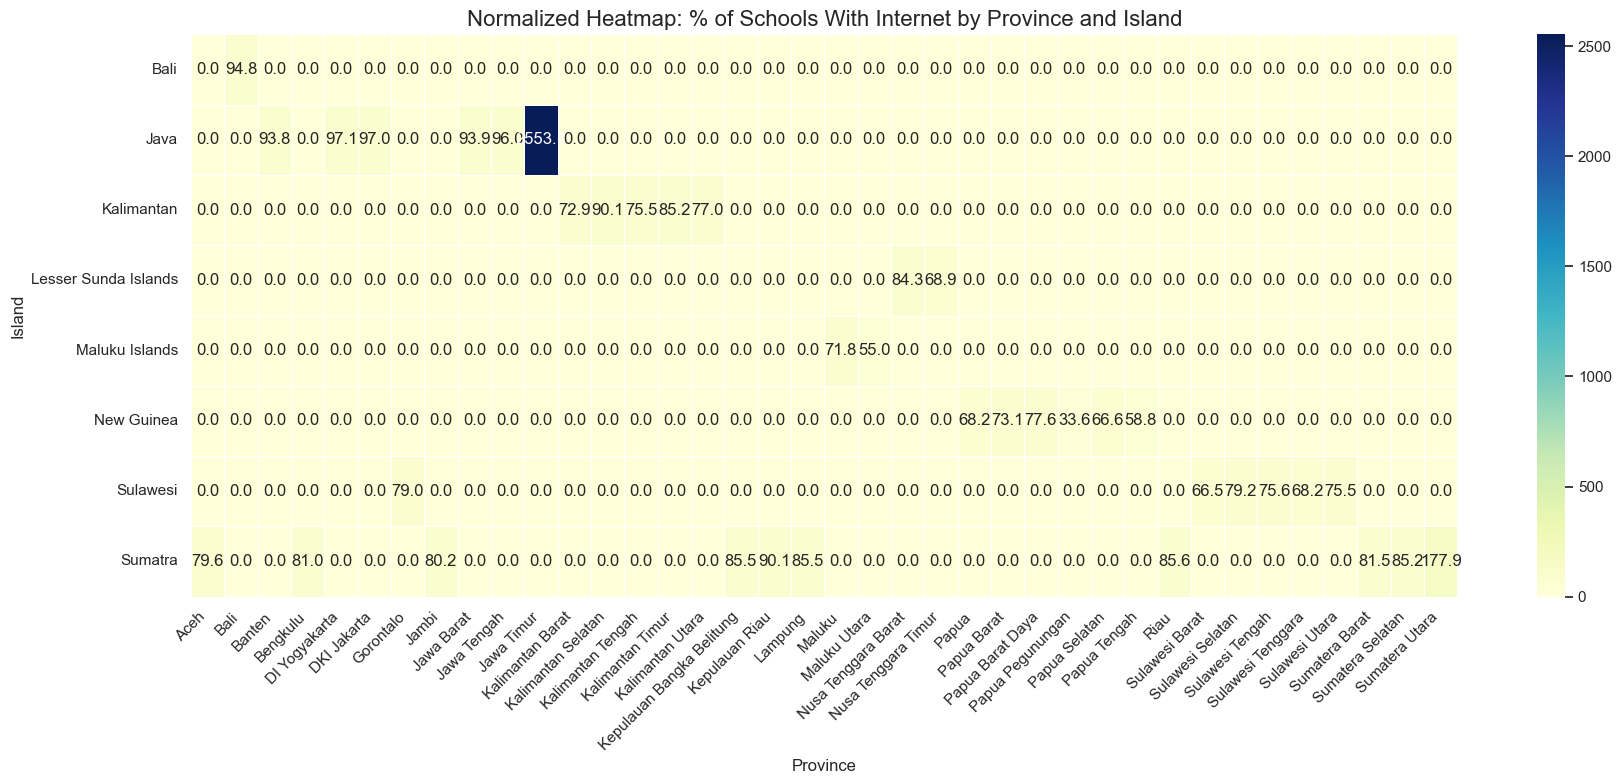

In [16]:
# Calculate percentage of schools with internet
df['Percent schools with internet'] = (
    df['Total number of schools with internet'] / df['Total number of all schools']
) * 100

# Prepare normalized heatmap data
normalized_data = df.groupby(['Island', 'Province'])['Percent schools with internet'].mean().unstack().fillna(0)

# Plot the normalized heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(normalized_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Normalized Heatmap: % of Schools With Internet by Province and Island", fontsize=16)
plt.xlabel("Province")
plt.ylabel("Island")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()